In [249]:
%load_ext autoreload
%autoreload 2

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
from torchvision import datasets, transforms
from tqdm import tqdm
from scipy.spatial.distance import euclidean

# import the project root
sys.path.insert(0, '../..')
from src.covertree import CoverTree 
from src.dyadictree import DyadicTree
from src.wavelettree import WaveletTree
from src.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [250]:
def load_dataset(flatten=False):
    num_points =30 
    transform = transforms.Compose([
        transforms.ToTensor()
    ])

    cifar10_train = datasets.MNIST(root='../../datasets', train=True, download=True, transform=transform)
    X = np.stack([np.array(img[0].numpy()) for img in cifar10_train][:num_points])  # shape: (1000, 3, 32, 32)

    original_shape = X.shape
    if flatten:
        X = X.reshape(X.shape[0], -1)
    # print(X.shape)
    return X, original_shape    

X, original_shape = load_dataset(flatten=True)
p_n_points = X.shape[0]
print("X shape: %s" % str(X.shape))
print(p_n_points)


X shape: (30, 784)
30


In [251]:
from scipy.spatial.distance import euclidean
python_covertree =  CoverTree(X, euclidean, leafsize=1)
mydiadic_tree    =  DyadicTree(python_covertree)
# wavelet_tree = WaveletTree(mydiadic_tree, X, 0, X.shape[-1], inverse=True,
#                            thresholds=0) # inverse means data in (n,d) formatdj

In [252]:
# gmra_q_coeff = wavelet_tree.fgwt(X)
# X_recon      = wavelet_tree.igwt(gmra_q_coeff, X.shape).reshape(original_shape)
# print("X_recon shape: %s" % str(X_recon.shape))

In [253]:
# fig, ax = plt.subplots(2, 10, figsize=(20, 4))
# for i in range(10):
#     ax[0, i].imshow(X[i].reshape(28, 28), cmap='gray')
#     ax[1, i].imshow(X_recon[i].reshape(28, 28), cmap='gray')


In [254]:
mydiadic_tree.idx_to_leaf_node[0]

In [255]:
# mydiadic_tree.traverse()

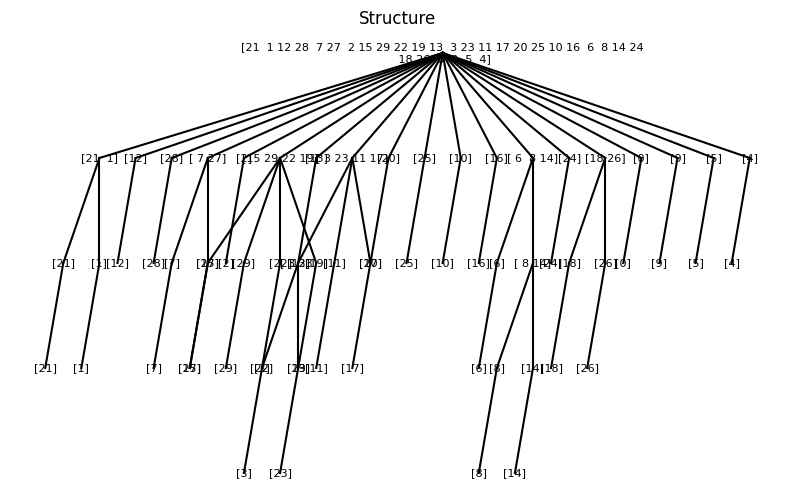

In [256]:
mydiadic_tree.plot_tree()

In [257]:
mydiadic_tree.grow_tree()

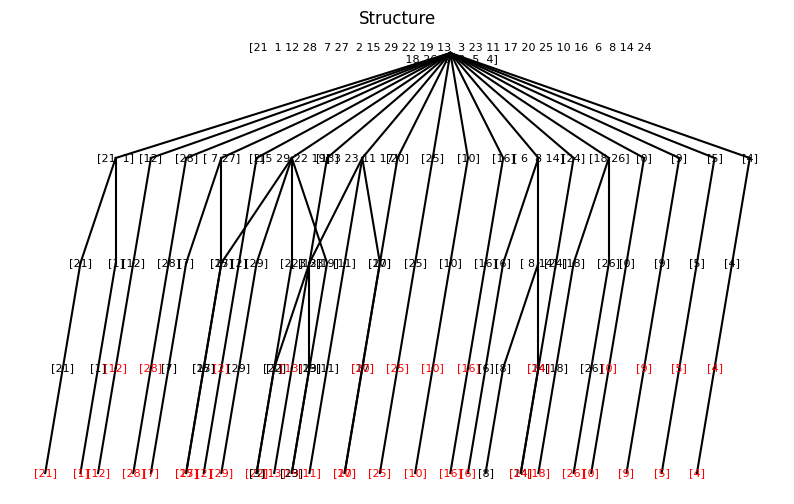

In [258]:
mydiadic_tree.plot_tree()

In [259]:
mydiadic_tree.idx_to_leaf_node[19]

In [260]:
node =  mydiadic_tree.idx_to_leaf_node[19]
print(node.idxs, node.fake_node)
while node.parent is not None:
    node = node.parent
    print(node.idxs, node.fake_node)

[19] True
[19] False
[19] False
[15 29 22 19] False
[21  1 12 28  7 27  2 15 29 22 19 13  3 23 11 17 20 25 10 16  6  8 14 24
 18 26  0  9  5  4] False


In [261]:
node.parent

In [262]:
# print the level of every leaf

def print_leaf_levels(tree):
    for idx, node in tree.idx_to_leaf_node.items():
        print(f"Leaf {idx} is at level {node.level}")

In [264]:
X.shape

(30, 784)

In [265]:
# x query random 5 x 784
X_query = X[np.random.choice(X.shape[0], 5, replace=False)]

In [266]:
# query and get the idx of the closest leaf node
_,nn_idx = python_covertree.query(X_query)

In [267]:
nn_idx

array([ 3, 28, 18, 22, 10])

In [269]:
leaves = mydiadic_tree.query_leaf(X_query)

In [271]:
node = leaves[0]
print(node)
while node.parent is not None:
    node = node.parent
    print(node)